# IMPORTING ESSENTIAL LIBRARIES

In [1]:
#importing all essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest,f_classif       
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# LOADING A FILE AS DATA

In [2]:
data=pd.read_csv('corporate_work_hours_productivity.csv')  #reading csv file as data
data

,Employee_ID,Age,Department,Job_Level,Years_at_Company,Monthly_Hours_Worked,Remote_Work,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Work_Life_Balance,Job_Satisfaction,Productivity_Score,Annual_Salary,Absences_Per_Year
0,1,45,Marketing,Mid,29,198,No,1,7,1,Good,5,88.73,182971,2
1,2,38,Marketing,Mid,7,157,Yes,13,3,10,Excellent,1,74.70,74217,13
2,3,53,Sales,Mid,8,146,No,2,15,11,Poor,4,67.85,176003,16
3,4,46,Finance,Mid,4,200,No,4,9,0,Poor,5,93.73,69209,1
4,5,28,Finance,Manager,5,193,Hybrid,11,9,6,Poor,7,93.30,195477,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,54,Sales,Entry,18,133,No,14,10,8,Good,3,87.36,182341,16
9996,9997,37,Sales,Mid,27,187,No,5,15,3,Good,5,51.76,152109,9
9997,9998,56,Finance,Senior,20,125,No,9,4,12,Average,6,62.42,93176,18
9998,9999,57,IT,Senior,13,123,No,7,7,5,Average,1,95.47,168995,18


# CONVERTING A DATA INTO PANDAS DATAFRAME

In [3]:
df=pd.DataFrame(data)  #converting data into dataframe
df

,Employee_ID,Age,Department,Job_Level,Years_at_Company,Monthly_Hours_Worked,Remote_Work,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Work_Life_Balance,Job_Satisfaction,Productivity_Score,Annual_Salary,Absences_Per_Year
0,1,45,Marketing,Mid,29,198,No,1,7,1,Good,5,88.73,182971,2
1,2,38,Marketing,Mid,7,157,Yes,13,3,10,Excellent,1,74.70,74217,13
2,3,53,Sales,Mid,8,146,No,2,15,11,Poor,4,67.85,176003,16
3,4,46,Finance,Mid,4,200,No,4,9,0,Poor,5,93.73,69209,1
4,5,28,Finance,Manager,5,193,Hybrid,11,9,6,Poor,7,93.30,195477,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,54,Sales,Entry,18,133,No,14,10,8,Good,3,87.36,182341,16
9996,9997,37,Sales,Mid,27,187,No,5,15,3,Good,5,51.76,152109,9
9997,9998,56,Finance,Senior,20,125,No,9,4,12,Average,6,62.42,93176,18
9998,9999,57,IT,Senior,13,123,No,7,7,5,Average,1,95.47,168995,18


# DESCRIPTIVE ANALYSIS

In [4]:
df.shape         #provides total no.of rows and columns in the df

(10000, 15)

In [5]:
df.size

150000

In [6]:
df.head(5)        #first 5 entries of dataframe

,Employee_ID,Age,Department,Job_Level,Years_at_Company,Monthly_Hours_Worked,Remote_Work,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Work_Life_Balance,Job_Satisfaction,Productivity_Score,Annual_Salary,Absences_Per_Year
0,1,45,Marketing,Mid,29,198,No,1,7,1,Good,5,88.73,182971,2
1,2,38,Marketing,Mid,7,157,Yes,13,3,10,Excellent,1,74.70,74217,13
2,3,53,Sales,Mid,8,146,No,2,15,11,Poor,4,67.85,176003,16
3,4,46,Finance,Mid,4,200,No,4,9,0,Poor,5,93.73,69209,1
4,5,28,Finance,Manager,5,193,Hybrid,11,9,6,Poor,7,93.30,195477,5


In [7]:
df.tail(5)              #last 5 entries of dataframe

,Employee_ID,Age,Department,Job_Level,Years_at_Company,Monthly_Hours_Worked,Remote_Work,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Work_Life_Balance,Job_Satisfaction,Productivity_Score,Annual_Salary,Absences_Per_Year
9995,9996,54,Sales,Entry,18,133,No,14,10,8,Good,3,87.36,182341,16
9996,9997,37,Sales,Mid,27,187,No,5,15,3,Good,5,51.76,152109,9
9997,9998,56,Finance,Senior,20,125,No,9,4,12,Average,6,62.42,93176,18
9998,9999,57,IT,Senior,13,123,No,7,7,5,Average,1,95.47,168995,18
9999,10000,22,HR,Senior,19,188,No,1,4,2,Poor,2,66.12,194360,8


In [8]:
df.columns              #all columns names in dataframe

Index(['Employee_ID', 'Age', 'Department', 'Job_Level', 'Years_at_Company',
       'Monthly_Hours_Worked', 'Remote_Work', 'Meetings_per_Week',
       'Tasks_Completed_Per_Day', 'Overtime_Hours_Per_Week',
       'Work_Life_Balance', 'Job_Satisfaction', 'Productivity_Score',
       'Annual_Salary', 'Absences_Per_Year'],
      dtype='object')

In [9]:
df.info()               #provides all infomation about a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee_ID              10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Department               10000 non-null  object 
 3   Job_Level                10000 non-null  object 
 4   Years_at_Company         10000 non-null  int64  
 5   Monthly_Hours_Worked     10000 non-null  int64  
 6   Remote_Work              10000 non-null  object 
 7   Meetings_per_Week        10000 non-null  int64  
 8   Tasks_Completed_Per_Day  10000 non-null  int64  
 9   Overtime_Hours_Per_Week  10000 non-null  int64  
 10  Work_Life_Balance        10000 non-null  object 
 11  Job_Satisfaction         10000 non-null  int64  
 12  Productivity_Score       10000 non-null  float64
 13  Annual_Salary            10000 non-null  int64  
 14  Absences_Per_Year      

In [10]:
df.describe()                     #provides statistical measures of every numerical columns 

,Employee_ID,Age,Years_at_Company,Monthly_Hours_Worked,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Job_Satisfaction,Productivity_Score,Annual_Salary,Absences_Per_Year
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,40.655800,14.935600,169.513100,6.975200,10.98120,6.948000,4.991600,75.389223,117257.446300,9.49360
std,2886.89568,11.005101,8.359931,28.775487,4.295606,4.89633,4.330332,2.586232,14.450485,47410.812846,5.76471
min,1.00000,22.000000,1.000000,120.000000,0.000000,3.00000,0.000000,1.000000,50.000000,35001.000000,0.00000
25%,2500.75000,31.000000,8.000000,145.000000,3.000000,7.00000,3.000000,3.000000,62.855000,75761.750000,4.00000
50%,5000.50000,41.000000,15.000000,170.000000,7.000000,11.00000,7.000000,5.000000,75.535000,117645.000000,9.00000
75%,7500.25000,50.000000,22.000000,194.000000,11.000000,15.00000,11.000000,7.000000,88.032500,157836.750000,14.00000
max,10000.00000,59.000000,29.000000,219.000000,14.000000,19.00000,14.000000,9.000000,100.000000,199997.000000,19.00000


In [11]:
df.dtypes                               #provides the data type of all columns

Employee_ID                  int64
Age                          int64
Department                  object
Job_Level                   object
Years_at_Company             int64
Monthly_Hours_Worked         int64
Remote_Work                 object
Meetings_per_Week            int64
Tasks_Completed_Per_Day      int64
Overtime_Hours_Per_Week      int64
Work_Life_Balance           object
Job_Satisfaction             int64
Productivity_Score         float64
Annual_Salary                int64
Absences_Per_Year            int64
dtype: object

# FINDING UNIQUE VALUES AND VALUECOUNTS FOR EVERY COLUMNS

In [12]:
df['Department'].unique()            #finding unique values in the column

array(['Marketing', 'Sales', 'Finance', 'IT', 'Operations', 'HR'],
      dtype=object)

In [13]:
df['Department'].value_counts()          #provides sum of all unique values in the column

Department
Sales         1715
HR            1684
IT            1677
Finance       1676
Marketing     1642
Operations    1606
Name: count, dtype: int64

In [14]:
df['Job_Level'].unique()

array(['Mid', 'Manager', 'Entry', 'Senior'], dtype=object)

In [15]:
df['Job_Level'].value_counts()

Job_Level
Mid        3949
Entry      3062
Senior     1954
Manager    1035
Name: count, dtype: int64

In [16]:
df['Remote_Work'].value_counts()

Remote_Work
No        4042
Hybrid    2996
Yes       2962
Name: count, dtype: int64

In [17]:
df['Work_Life_Balance'].value_counts()

Work_Life_Balance
Average      4071
Good         2961
Poor         1989
Excellent     979
Name: count, dtype: int64

In [18]:
df['Job_Satisfaction'].value_counts()

Job_Satisfaction
6    1151
9    1131
2    1126
1    1118
3    1116
7    1115
4    1102
5    1076
8    1065
Name: count, dtype: int64

In [19]:
df['Productivity_Score'].value_counts()        

Productivity_Score
84.11    8
57.79    8
87.33    8
74.18    7
99.34    7
        ..
57.72    1
90.76    1
95.50    1
53.04    1
97.79    1
Name: count, Length: 4333, dtype: int64

# HANDLING MISSING VALUES

In [20]:
df.isnull().sum()                   #checking for any null values

Employee_ID                0
Age                        0
Department                 0
Job_Level                  0
Years_at_Company           0
Monthly_Hours_Worked       0
Remote_Work                0
Meetings_per_Week          0
Tasks_Completed_Per_Day    0
Overtime_Hours_Per_Week    0
Work_Life_Balance          0
Job_Satisfaction           0
Productivity_Score         0
Annual_Salary              0
Absences_Per_Year          0
dtype: int64

In [21]:
df.isna().sum()            #checking for any Nan values

Employee_ID                0
Age                        0
Department                 0
Job_Level                  0
Years_at_Company           0
Monthly_Hours_Worked       0
Remote_Work                0
Meetings_per_Week          0
Tasks_Completed_Per_Day    0
Overtime_Hours_Per_Week    0
Work_Life_Balance          0
Job_Satisfaction           0
Productivity_Score         0
Annual_Salary              0
Absences_Per_Year          0
dtype: int64

# HANDLING DUPLICATES

In [22]:
df.duplicated().sum()          #checking for duplicate values

np.int64(0)

# VISUALIZING DATA USING MATPLOTLIB AND SEABORN

In [23]:
df.columns 

Index(['Employee_ID', 'Age', 'Department', 'Job_Level', 'Years_at_Company',
       'Monthly_Hours_Worked', 'Remote_Work', 'Meetings_per_Week',
       'Tasks_Completed_Per_Day', 'Overtime_Hours_Per_Week',
       'Work_Life_Balance', 'Job_Satisfaction', 'Productivity_Score',
       'Annual_Salary', 'Absences_Per_Year'],
      dtype='object')

# HISTPLOTS

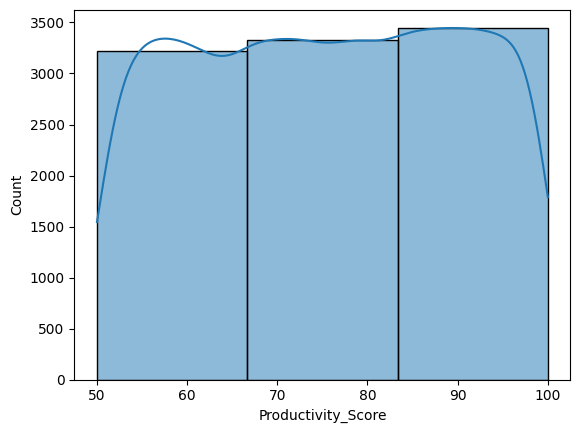

In [24]:
sns.histplot(data=df,x='Productivity_Score',bins=3,kde=True)    #ploting histogram using seaborn
plt.show()

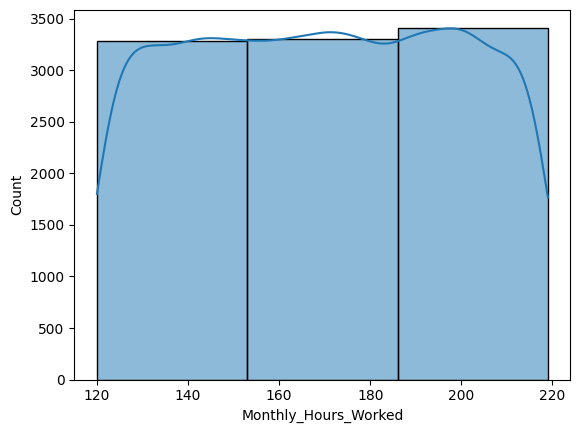

In [25]:
sns.histplot(data=df,x='Monthly_Hours_Worked',bins=3,kde=True)       #ploting histogram using seaborn
plt.show()

# LINE PLOT

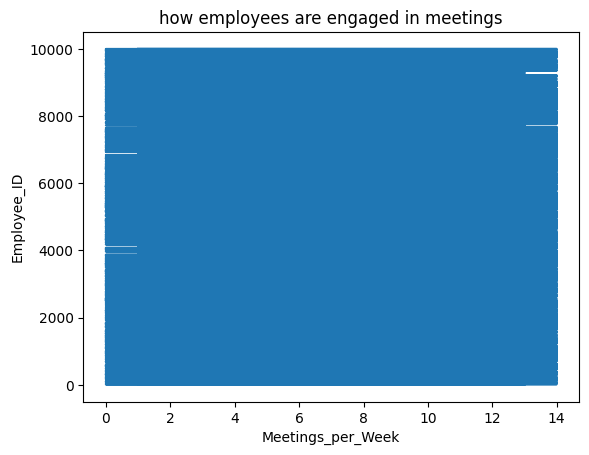

In [26]:
plt.plot(df['Meetings_per_Week'],df['Employee_ID'])  #plotting lineplot using Matplotlib
plt.xlabel('Meetings_per_Week')
plt.ylabel('Employee_ID')
plt.title('how employees are engaged in meetings')     
plt.show()

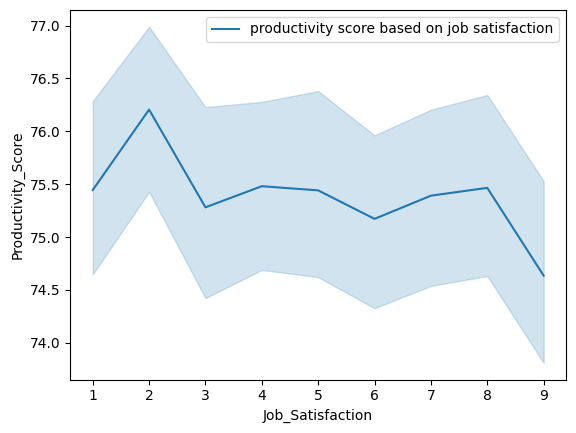

In [27]:
sns.lineplot(x=df['Job_Satisfaction'],y=df['Productivity_Score'],data=df,label='productivity score based on job satisfaction')#ploting line using seaborn
plt.show()

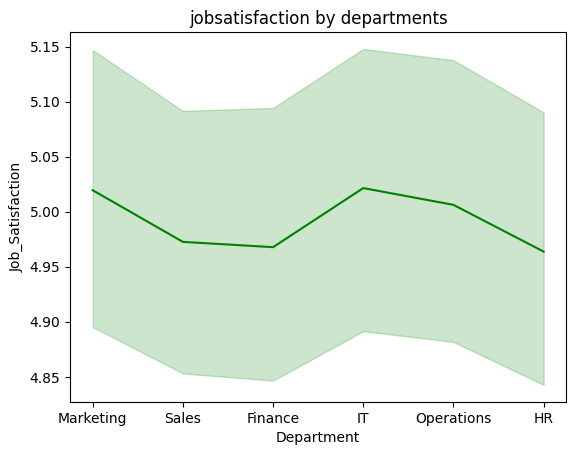

In [28]:
sns.lineplot(x='Department',y='Job_Satisfaction',data=df,color='green')#ploting lineplot using seaborn
plt.title('jobsatisfaction by departments')
plt.show()

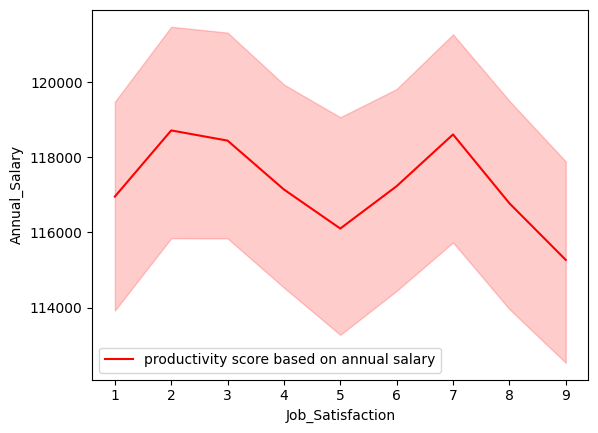

In [29]:
sns.lineplot(x=df['Job_Satisfaction'],y=df['Annual_Salary'],data=df,label='productivity score based on annual salary',color='red')
plt.show()

# BAR PLOT

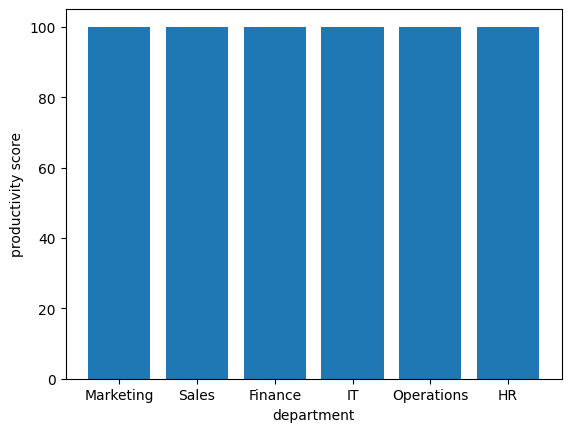

In [30]:
plt.bar(df['Department'],df['Productivity_Score'])     #ploting barplot using matplotlib
plt.xlabel('department')
plt.ylabel('productivity score')
plt.show()

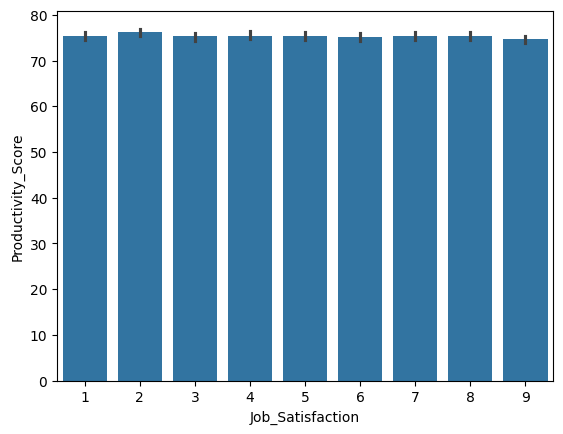

In [31]:
sns.barplot(x='Job_Satisfaction',y='Productivity_Score',data=df)    #ploting barplot using seaborn
plt.show()

# SCATTER PLOT

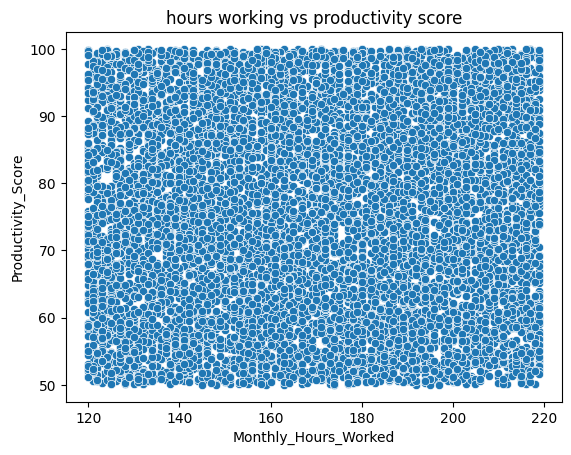

In [32]:
sns.scatterplot(x=df['Monthly_Hours_Worked'],y=df['Productivity_Score'],data=df)    #ploting scatterplot using seaborn
plt.title('hours working vs productivity score')
plt.show()

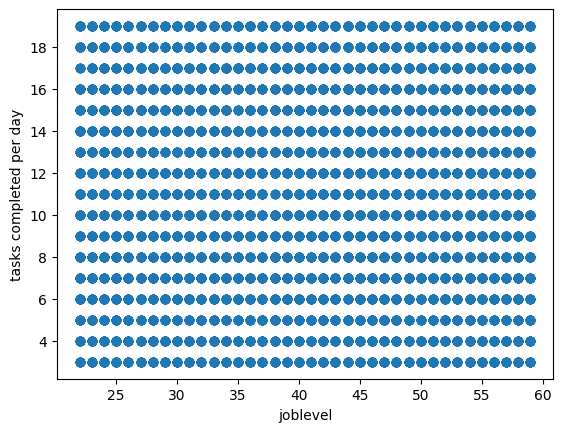

In [33]:
plt.scatter(df['Age'],df['Tasks_Completed_Per_Day'])    #ploting scatterplot using matplotlib
plt.xlabel('joblevel')
plt.ylabel('tasks completed per day')
plt.show()

# PIE CHARTS

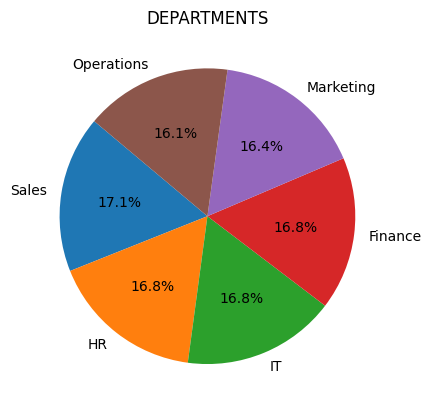

In [34]:
dept_counts = df['Department'].value_counts()
p=df['Productivity_Score'].value_counts()
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%', startangle=140)  #ploting pieplot using matplotlib
plt.title('DEPARTMENTS')
plt.show()

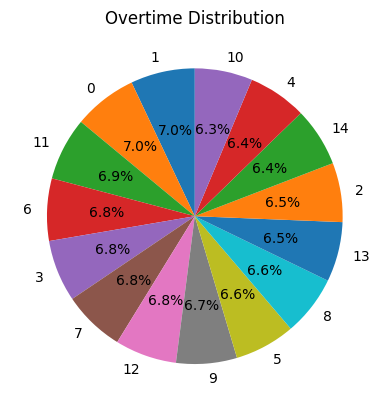

In [35]:
overtime_counts = df['Overtime_Hours_Per_Week'].value_counts()
plt.pie(overtime_counts, labels=overtime_counts.index, autopct='%1.1f%%', 
        startangle=90)    #ploting pieplot using matplotlib
plt.title('Overtime Distribution')
plt.show()

# ploting box plot to detect any outliers in dataset

<Axes: >

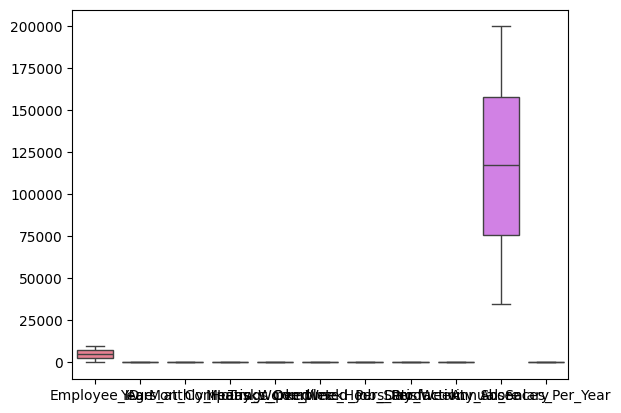

In [36]:
import seaborn as sns
sns.boxplot(data=df)  #ploting boxplot using seaborn

# Finding correlation between numerical columns and plotting heat map

In [37]:
co=df.select_dtypes(include='number').corr()  #finding correlations of numerical columns
co

,Employee_ID,Age,Years_at_Company,Monthly_Hours_Worked,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Job_Satisfaction,Productivity_Score,Annual_Salary,Absences_Per_Year
Employee_ID,1.000000,0.008597,0.013631,0.003167,-0.001850,-0.004726,0.007631,0.015837,0.000413,0.000713,-0.012710
Age,0.008597,1.000000,0.004679,0.021098,0.001535,-0.003181,0.015582,0.002372,0.000342,-0.001713,0.000043
Years_at_Company,0.013631,0.004679,1.000000,-0.006533,-0.000337,-0.001017,0.002689,-0.002754,-0.005539,0.001936,-0.010507
Monthly_Hours_Worked,0.003167,0.021098,-0.006533,1.000000,0.005685,0.002209,-0.007026,0.004098,0.016655,0.015555,-0.005773
Meetings_per_Week,-0.001850,0.001535,-0.000337,0.005685,1.000000,0.015084,0.008963,0.026007,-0.013293,-0.003506,-0.021500
Tasks_Completed_Per_Day,-0.004726,-0.003181,-0.001017,0.002209,0.015084,1.000000,0.014034,0.018555,-0.010304,-0.018397,-0.011736
Overtime_Hours_Per_Week,0.007631,0.015582,0.002689,-0.007026,0.008963,0.014034,1.000000,0.002801,-0.006639,-0.019491,0.009794
Job_Satisfaction,0.015837,0.002372,-0.002754,0.004098,0.026007,0.018555,0.002801,1.000000,-0.016788,-0.011133,-0.004927
Productivity_Score,0.000413,0.000342,-0.005539,0.016655,-0.013293,-0.010304,-0.006639,-0.016788,1.000000,0.004806,-0.009229
Annual_Salary,0.000713,-0.001713,0.001936,0.015555,-0.003506,-0.018397,-0.019491,-0.011133,0.004806,1.000000,0.014703


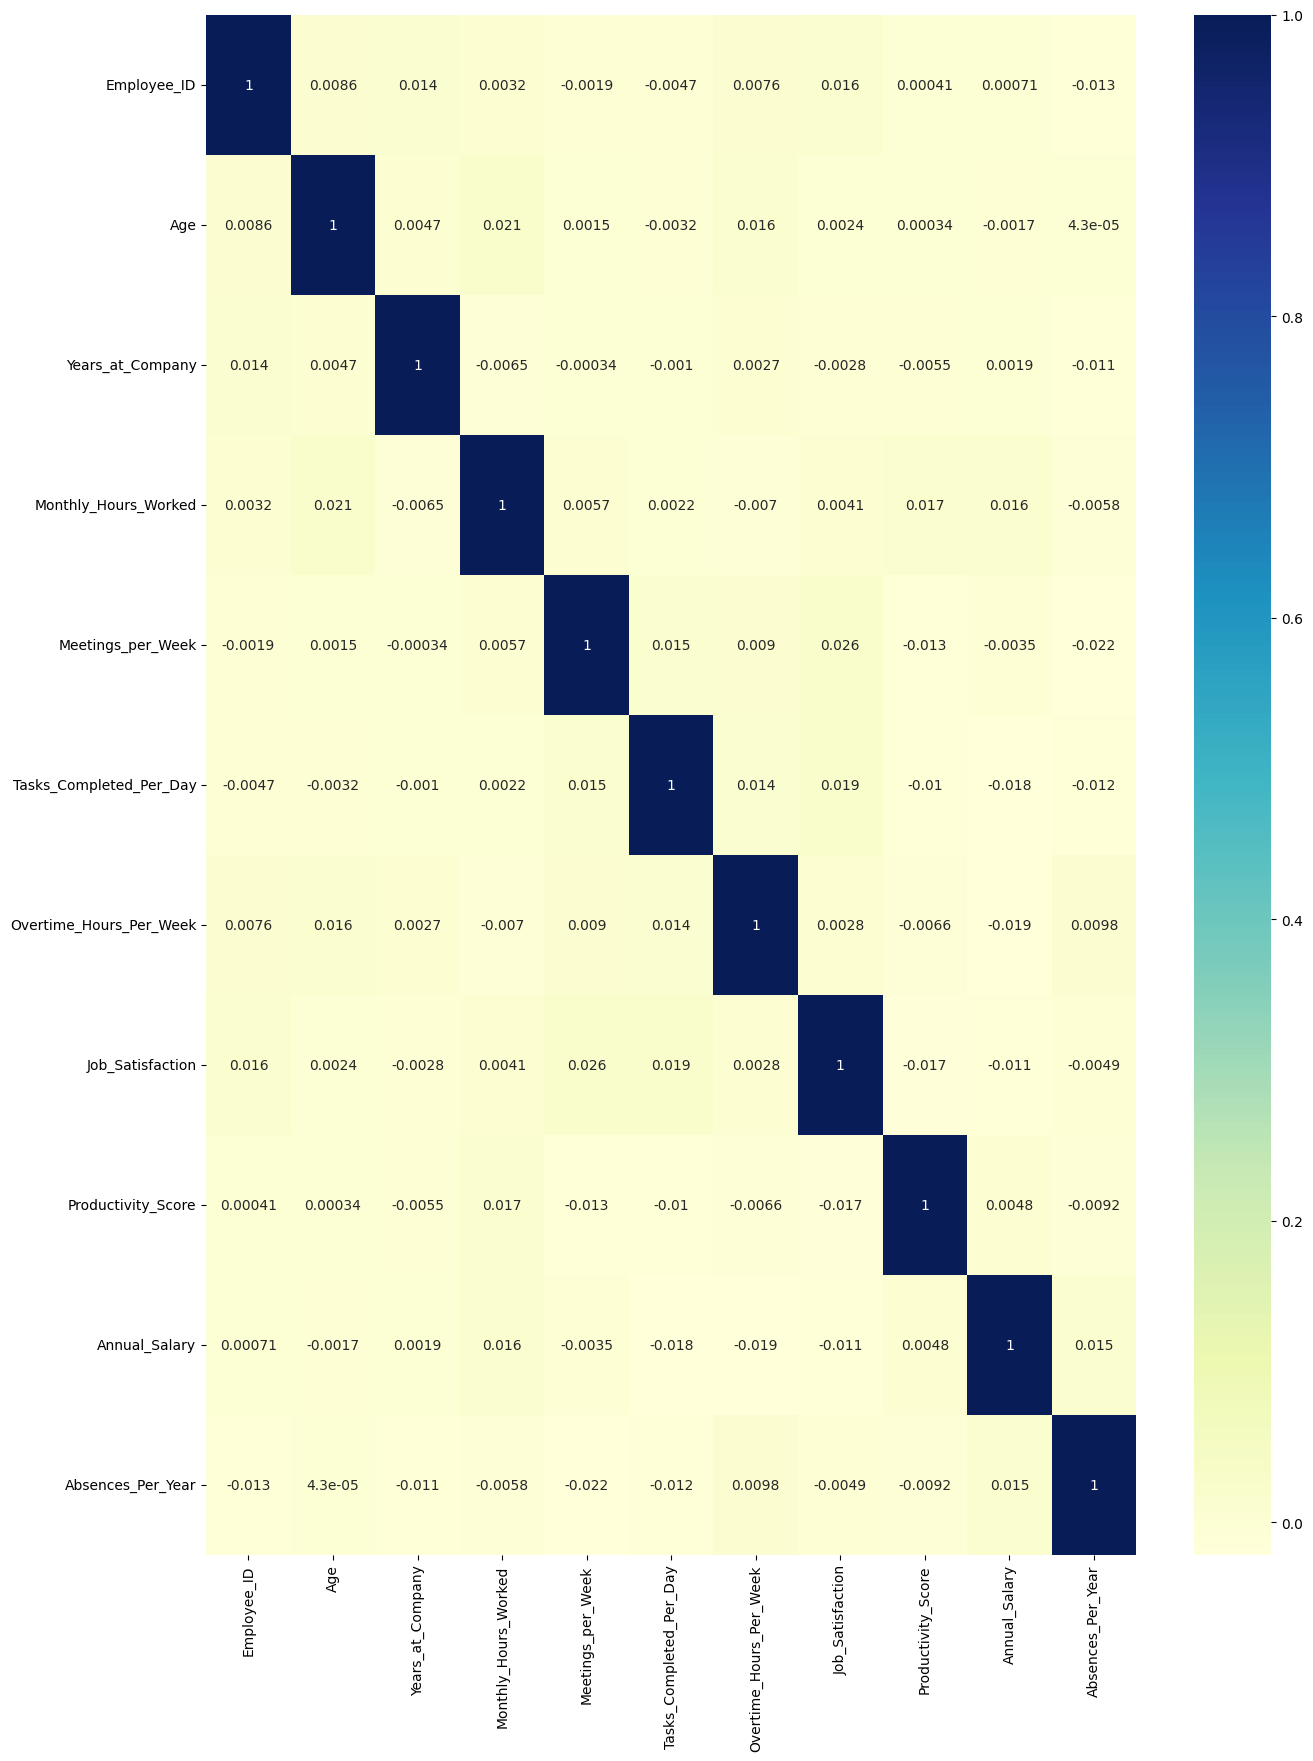

In [38]:
plt.figure(figsize=(15,20))
sns.heatmap(co,annot=True,cmap='YlGnBu')  #ploting heatmap using seaborn
plt.show()

# STATISTICAL ANALYSIS

## Checking for Skewness for all numerical columns 

In [39]:
a=df.select_dtypes(include='number').skew() #checking skewness
a

Employee_ID                0.000000
Age                       -0.022056
Years_at_Company           0.022454
Monthly_Hours_Worked      -0.006211
Meetings_per_Week          0.004774
Tasks_Completed_Per_Day    0.004459
Overtime_Hours_Per_Week    0.005865
Job_Satisfaction           0.005270
Productivity_Score        -0.026534
Annual_Salary              0.006355
Absences_Per_Year         -0.000802
dtype: float64

## Find mean value for all numerical columns 

In [40]:
b=df.select_dtypes(include='number').mean()   #finding mean
b

Employee_ID                  5000.500000
Age                            40.655800
Years_at_Company               14.935600
Monthly_Hours_Worked          169.513100
Meetings_per_Week               6.975200
Tasks_Completed_Per_Day        10.981200
Overtime_Hours_Per_Week         6.948000
Job_Satisfaction                4.991600
Productivity_Score             75.389223
Annual_Salary              117257.446300
Absences_Per_Year               9.493600
dtype: float64

## Finding Kurtosis for all numerical column

In [41]:
k=df.select_dtypes(include='number').kurt()   #finding kurtosis 
k

Employee_ID               -1.200000
Age                       -1.218881
Years_at_Company          -1.193447
Monthly_Hours_Worked      -1.192116
Meetings_per_Week         -1.198994
Tasks_Completed_Per_Day   -1.200766
Overtime_Hours_Per_Week   -1.214844
Job_Satisfaction          -1.231192
Productivity_Score        -1.204809
Annual_Salary             -1.191311
Absences_Per_Year         -1.199985
dtype: float64

## SKEWNESS USING POWER TRANSFORMER FROM SKLEARN

In [42]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')       #using yeo-johnson method in powertransformer 
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [43]:
df_transformed = pd.DataFrame(
    pt.fit_transform(df[numeric_cols]),
    columns=numeric_cols
)        #converting it to dataframe

In [44]:
df_transformed.skew()   #checking skewness of tranformed df

Employee_ID               -0.290307
Age                       -0.090083
Years_at_Company          -0.203128
Monthly_Hours_Worked      -0.053134
Meetings_per_Week         -0.222712
Tasks_Completed_Per_Day   -0.140095
Overtime_Hours_Per_Week   -0.226936
Job_Satisfaction          -0.151761
Productivity_Score        -0.065290
Annual_Salary             -0.137423
Absences_Per_Year         -0.236679
dtype: float64

## Plotting Histplot 

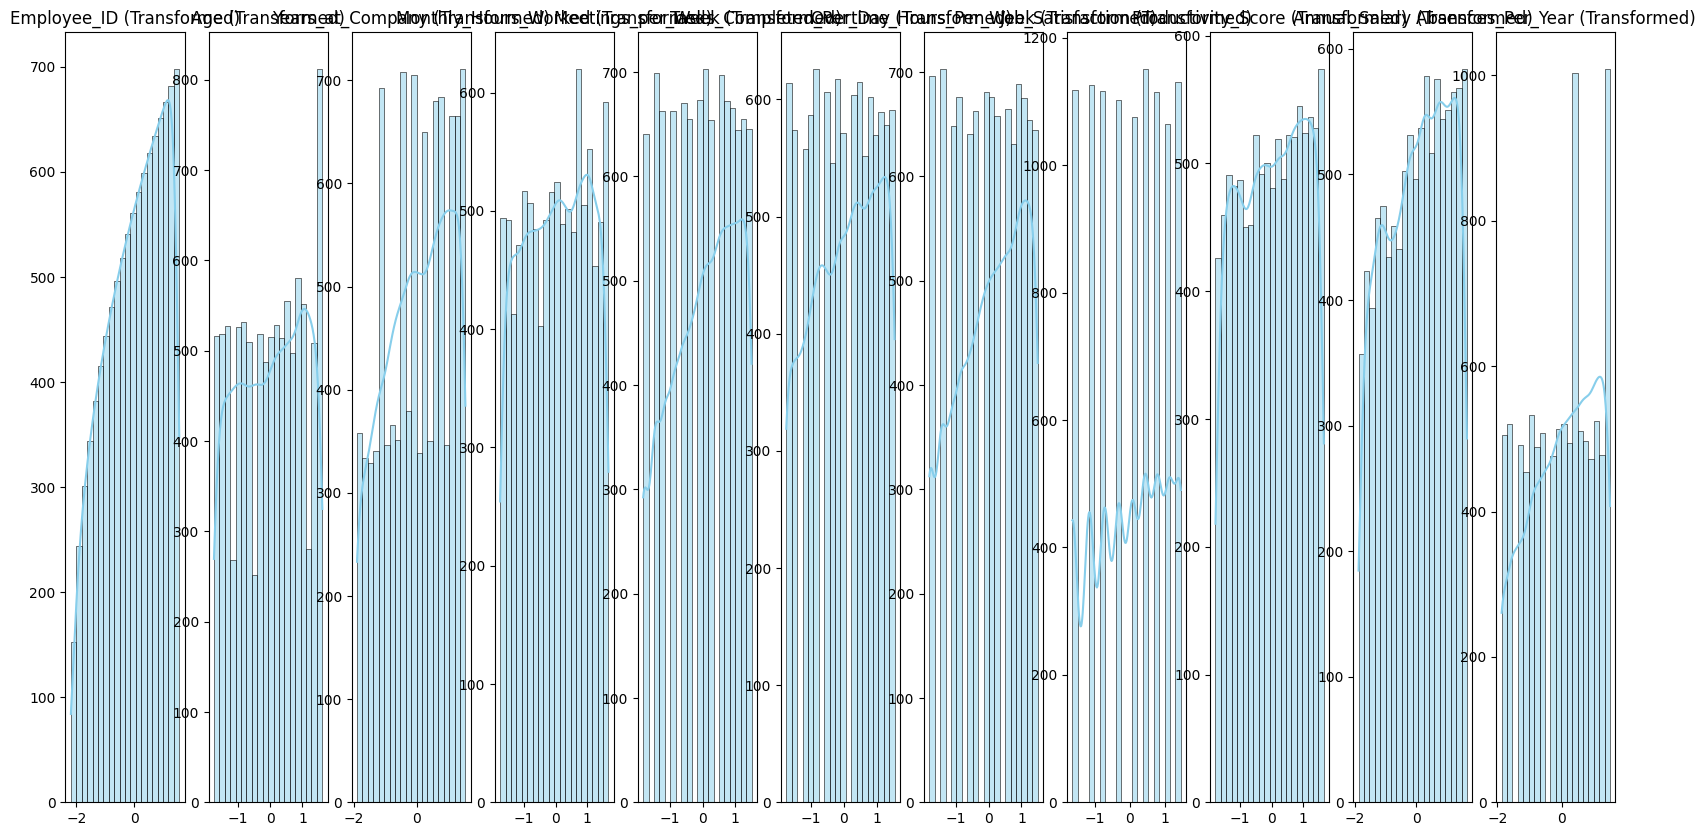

In [45]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.histplot(df_transformed[col], kde=True, bins=20, color='skyblue')  #plotting histplot of the transformed df
    plt.title(f"{col} (Transformed)")
    plt.xlabel('')
    plt.ylabel('')

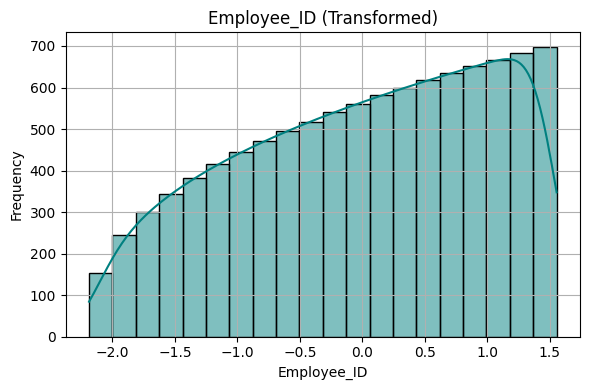

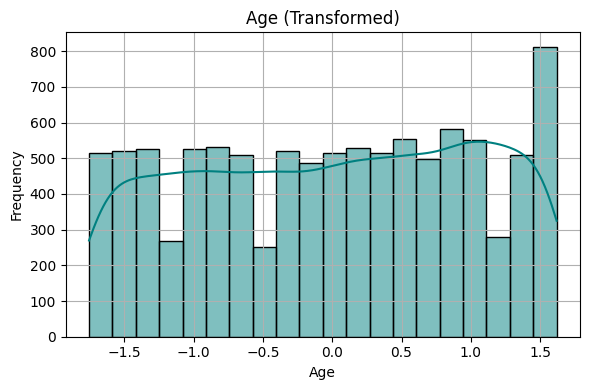

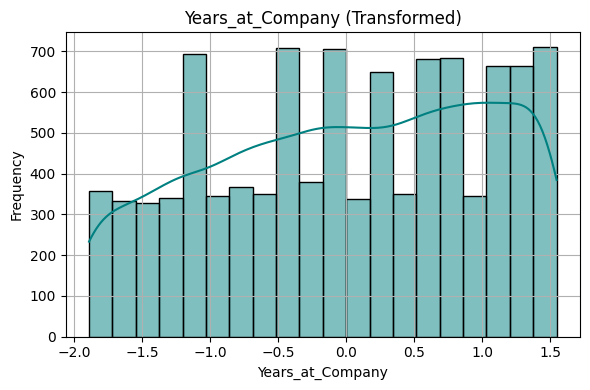

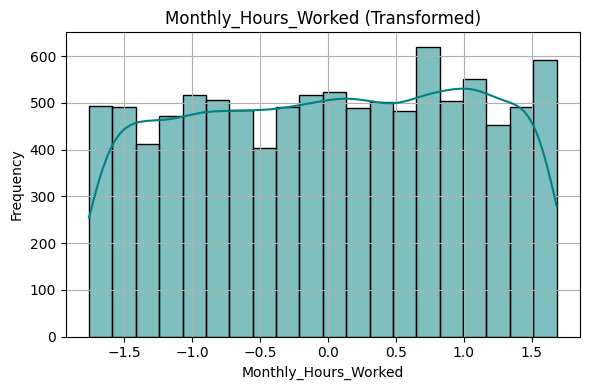

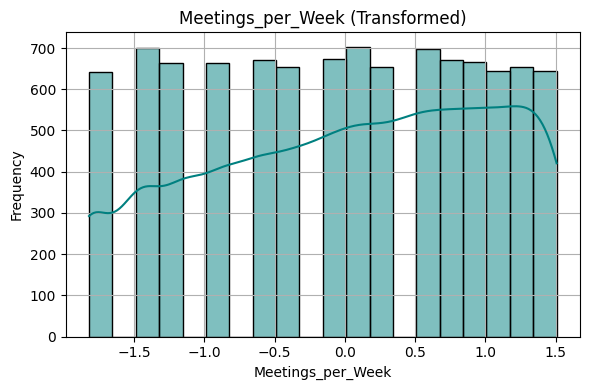

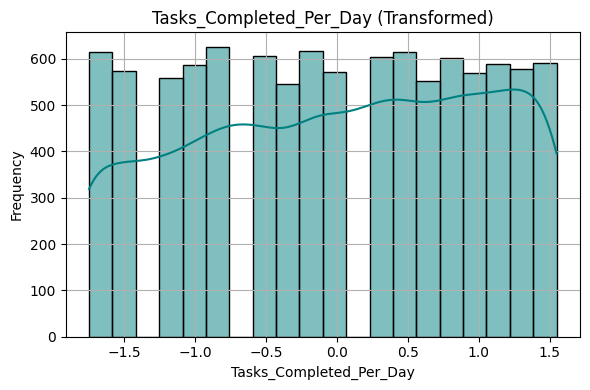

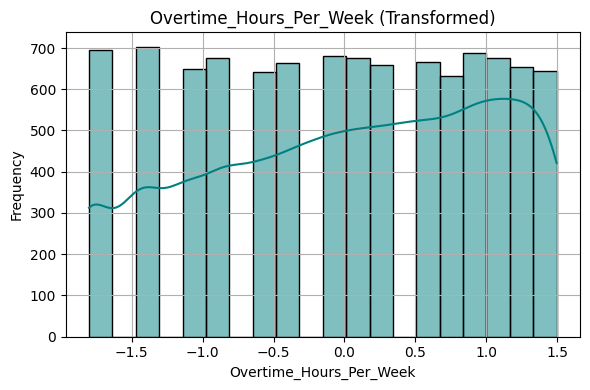

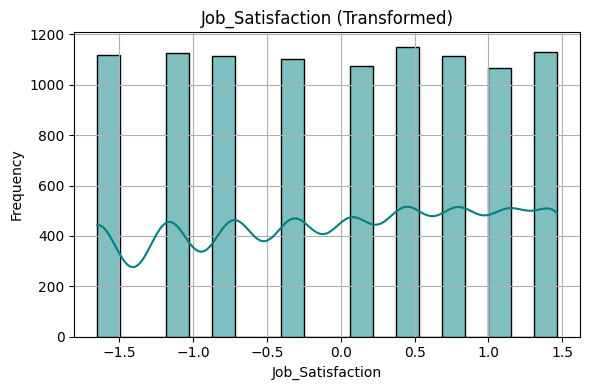

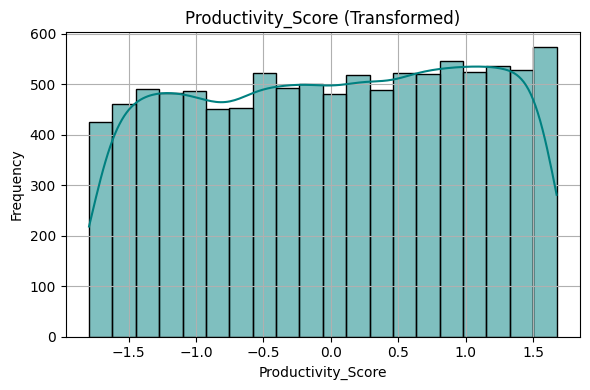

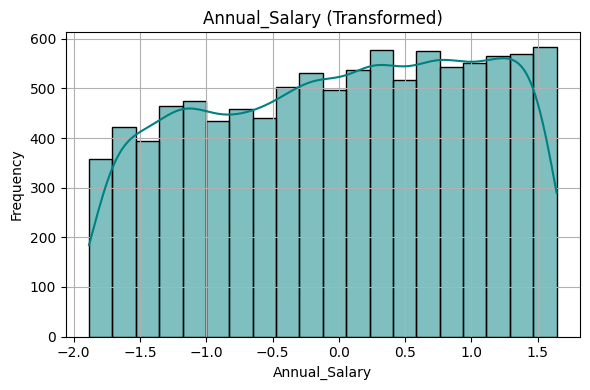

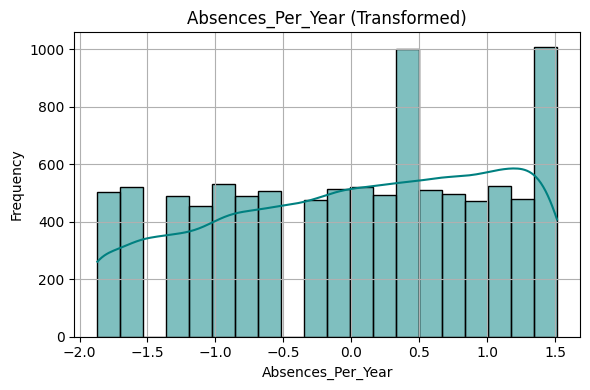

In [46]:
# Plot each column individually
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_transformed[col], kde=True, bins=20, color='teal')
    plt.title(f"{col} (Transformed)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [47]:
df

,Employee_ID,Age,Department,Job_Level,Years_at_Company,Monthly_Hours_Worked,Remote_Work,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Work_Life_Balance,Job_Satisfaction,Productivity_Score,Annual_Salary,Absences_Per_Year
0,1,45,Marketing,Mid,29,198,No,1,7,1,Good,5,88.73,182971,2
1,2,38,Marketing,Mid,7,157,Yes,13,3,10,Excellent,1,74.70,74217,13
2,3,53,Sales,Mid,8,146,No,2,15,11,Poor,4,67.85,176003,16
3,4,46,Finance,Mid,4,200,No,4,9,0,Poor,5,93.73,69209,1
4,5,28,Finance,Manager,5,193,Hybrid,11,9,6,Poor,7,93.30,195477,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,54,Sales,Entry,18,133,No,14,10,8,Good,3,87.36,182341,16
9996,9997,37,Sales,Mid,27,187,No,5,15,3,Good,5,51.76,152109,9
9997,9998,56,Finance,Senior,20,125,No,9,4,12,Average,6,62.42,93176,18
9998,9999,57,IT,Senior,13,123,No,7,7,5,Average,1,95.47,168995,18


In [48]:
# Binning into Low, Medium, High
bins = [0, 50, 75, 100]
labels = ['Low', 'Medium', 'High']

df['Productivity_Level'] = pd.cut(df['Productivity_Score'], bins=bins, labels=labels)

In [49]:
df

,Employee_ID,Age,Department,Job_Level,Years_at_Company,Monthly_Hours_Worked,Remote_Work,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Work_Life_Balance,Job_Satisfaction,Productivity_Score,Annual_Salary,Absences_Per_Year,Productivity_Level
0,1,45,Marketing,Mid,29,198,No,1,7,1,Good,5,88.73,182971,2,High
1,2,38,Marketing,Mid,7,157,Yes,13,3,10,Excellent,1,74.70,74217,13,Medium
2,3,53,Sales,Mid,8,146,No,2,15,11,Poor,4,67.85,176003,16,Medium
3,4,46,Finance,Mid,4,200,No,4,9,0,Poor,5,93.73,69209,1,High
4,5,28,Finance,Manager,5,193,Hybrid,11,9,6,Poor,7,93.30,195477,5,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,54,Sales,Entry,18,133,No,14,10,8,Good,3,87.36,182341,16,High
9996,9997,37,Sales,Mid,27,187,No,5,15,3,Good,5,51.76,152109,9,Medium
9997,9998,56,Finance,Senior,20,125,No,9,4,12,Average,6,62.42,93176,18,Medium
9998,9999,57,IT,Senior,13,123,No,7,7,5,Average,1,95.47,168995,18,High


## Encoding Target Variable using LabelEncoder from Sklearn.preprocessing

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()    # assigning label encoder to a variable
df['Productivity_Level'] = le.fit_transform(df['Productivity_Level'])   
df

,Employee_ID,Age,Department,Job_Level,Years_at_Company,Monthly_Hours_Worked,Remote_Work,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Work_Life_Balance,Job_Satisfaction,Productivity_Score,Annual_Salary,Absences_Per_Year,Productivity_Level
0,1,45,Marketing,Mid,29,198,No,1,7,1,Good,5,88.73,182971,2,0
1,2,38,Marketing,Mid,7,157,Yes,13,3,10,Excellent,1,74.70,74217,13,2
2,3,53,Sales,Mid,8,146,No,2,15,11,Poor,4,67.85,176003,16,2
3,4,46,Finance,Mid,4,200,No,4,9,0,Poor,5,93.73,69209,1,0
4,5,28,Finance,Manager,5,193,Hybrid,11,9,6,Poor,7,93.30,195477,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,54,Sales,Entry,18,133,No,14,10,8,Good,3,87.36,182341,16,0
9996,9997,37,Sales,Mid,27,187,No,5,15,3,Good,5,51.76,152109,9,2
9997,9998,56,Finance,Senior,20,125,No,9,4,12,Average,6,62.42,93176,18,2
9998,9999,57,IT,Senior,13,123,No,7,7,5,Average,1,95.47,168995,18,0


# Encoding using One hot Encoder from sklearn.preprocessing

In [51]:
from sklearn.preprocessing import OneHotEncoder
# Columns to encode
categorical_cols = ['Work_Life_Balance', 'Remote_Work', 'Job_Level', 'Department']
# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop=None)  # drop='first' if you want to avoid multicollinearity
# Fit and transform
encoded_array = ohe.fit_transform(df[categorical_cols])
# Create a DataFrame with new column names
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(categorical_cols))
# Concatenate the encoded columns with original data
df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)
df_encoded

,Employee_ID,Age,Years_at_Company,Monthly_Hours_Worked,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Job_Satisfaction,Productivity_Score,Annual_Salary,...,Job_Level_Entry,Job_Level_Manager,Job_Level_Mid,Job_Level_Senior,Department_Finance,Department_HR,Department_IT,Department_Marketing,Department_Operations,Department_Sales
0,1,45,29,198,1,7,1,5,88.73,182971,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,38,7,157,13,3,10,1,74.70,74217,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,53,8,146,2,15,11,4,67.85,176003,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,46,4,200,4,9,0,5,93.73,69209,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,28,5,193,11,9,6,7,93.30,195477,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,54,18,133,14,10,8,3,87.36,182341,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9996,9997,37,27,187,5,15,3,5,51.76,152109,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9997,9998,56,20,125,9,4,12,6,62.42,93176,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9998,9999,57,13,123,7,7,5,1,95.47,168995,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## FEATURE SELECTION

In [52]:
from sklearn.feature_selection import SelectKBest,f_classif       #f_regressor
skb= SelectKBest(score_func=f_classif,k=10)  #assigning it to variable
y= df_encoded['Productivity_Level']
X= df_encoded.drop('Productivity_Level', axis=1)

In [53]:
X.columns

Index(['Employee_ID', 'Age', 'Years_at_Company', 'Monthly_Hours_Worked',
       'Meetings_per_Week', 'Tasks_Completed_Per_Day',
       'Overtime_Hours_Per_Week', 'Job_Satisfaction', 'Productivity_Score',
       'Annual_Salary', 'Absences_Per_Year', 'Work_Life_Balance_Average',
       'Work_Life_Balance_Excellent', 'Work_Life_Balance_Good',
       'Work_Life_Balance_Poor', 'Remote_Work_Hybrid', 'Remote_Work_No',
       'Remote_Work_Yes', 'Job_Level_Entry', 'Job_Level_Manager',
       'Job_Level_Mid', 'Job_Level_Senior', 'Department_Finance',
       'Department_HR', 'Department_IT', 'Department_Marketing',
       'Department_Operations', 'Department_Sales'],
      dtype='object')

In [54]:
y

0       0
1       2
2       2
3       0
4       0
       ..
9995    0
9996    2
9997    2
9998    0
9999    2
Name: Productivity_Level, Length: 10000, dtype: int64

In [55]:
X_new = skb.fit_transform(X , y)    #fit and transform

In [56]:
selected_columns= X.columns[skb.get_support()]
selected_columns

Index(['Meetings_per_Week', 'Overtime_Hours_Per_Week', 'Job_Satisfaction',
       'Productivity_Score', 'Work_Life_Balance_Average',
       'Work_Life_Balance_Good', 'Work_Life_Balance_Poor',
       'Department_Finance', 'Department_IT', 'Department_Operations'],
      dtype='object')

# feature selection score for each columns

In [57]:
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': skb.scores_
}).sort_values(by='Score', ascending=False)
feature_scores     

,Feature,Score
8,Productivity_Score,15098.207093
26,Department_Operations,6.234770
7,Job_Satisfaction,1.934431
24,Department_IT,1.643758
11,Work_Life_Balance_Average,1.496374
22,Department_Finance,1.308050
4,Meetings_per_Week,1.139181
13,Work_Life_Balance_Good,0.989068
6,Overtime_Hours_Per_Week,0.962111
14,Work_Life_Balance_Poor,0.958597


In [58]:
X_selected= X[selected_columns]
X_selected

,Meetings_per_Week,Overtime_Hours_Per_Week,Job_Satisfaction,Productivity_Score,Work_Life_Balance_Average,Work_Life_Balance_Good,Work_Life_Balance_Poor,Department_Finance,Department_IT,Department_Operations
0,1,1,5,88.73,0.0,1.0,0.0,0.0,0.0,0.0
1,13,10,1,74.70,0.0,0.0,0.0,0.0,0.0,0.0
2,2,11,4,67.85,0.0,0.0,1.0,0.0,0.0,0.0
3,4,0,5,93.73,0.0,0.0,1.0,1.0,0.0,0.0
4,11,6,7,93.30,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,14,8,3,87.36,0.0,1.0,0.0,0.0,0.0,0.0
9996,5,3,5,51.76,0.0,1.0,0.0,0.0,0.0,0.0
9997,9,12,6,62.42,1.0,0.0,0.0,1.0,0.0,0.0
9998,7,5,1,95.47,1.0,0.0,0.0,0.0,1.0,0.0


# SCALING (0-1)
- Standard scaler(0-1)
- Min-Max scaler 

In [59]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()  #assigning StandardScaler to a variable
X_scaled= ss.fit_transform(X_selected)
X_scaled

array([[-1.39107239, -1.37363557,  0.00324813, ..., -0.4487154 ,
        -0.4488762 , -0.43740958],
       [ 1.40261965,  0.70483116, -1.54348059, ..., -0.4487154 ,
        -0.4488762 , -0.43740958],
       [-1.15826472,  0.93577191, -0.38343405, ..., -0.4487154 ,
        -0.4488762 , -0.43740958],
       ...,
       [ 0.47138897,  1.16671266,  0.38993031, ...,  2.2285841 ,
        -0.4488762 , -0.43740958],
       [ 0.00577363, -0.44987258, -1.54348059, ..., -0.4487154 ,
         2.22778572, -0.43740958],
       [-1.39107239, -1.14269482, -1.15679841, ..., -0.4487154 ,
        -0.4488762 , -0.43740958]], shape=(10000, 10))

# Training and testing

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.2,random_state=40)

In [61]:
print('X_train Shape:',X_train.shape)
print('X_test Shape:',X_test.shape)
print('y_train Shape:',y_train.shape)
print('y_test Shape:',y_test.shape)

X_train Shape: (8000, 10)
X_test Shape: (2000, 10)
y_train Shape: (8000,)
y_test Shape: (2000,)


In [62]:
y.value_counts()    #imbalanced data, oversampling

Productivity_Level
0    5111
2    4887
1       2
Name: count, dtype: int64

# SMOTE TECHNIQUE--- MAKE IT BEFORE FEATURE SELECTION -- TO MAKE DATA BALANCED
- oversampling--- increase row size
- undersampling---decrease row size

In [63]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(k_neighbors=1, random_state=42)


In [64]:
x_smote, y_smote = smote.fit_resample(df_encoded[(i for i in list(df_encoded.describe(include='all').columns) if i != 'Productivity_Level')], df_encoded['Productivity_Level'])
print('length of y smote',len(y_smote))

length of y smote 15333


In [65]:
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df_encoded.describe(include='all').columns) if i != 'Productivity_Level'))
balanced_df

,Employee_ID,Age,Years_at_Company,Monthly_Hours_Worked,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Job_Satisfaction,Productivity_Score,Annual_Salary,...,Job_Level_Entry,Job_Level_Manager,Job_Level_Mid,Job_Level_Senior,Department_Finance,Department_HR,Department_IT,Department_Marketing,Department_Operations,Department_Sales
0,1,45,29,198,1,7,1,5,88.730000,182971,...,0.000000,0.0,1.000000,0.000000,0.00000,0.000000,0.0,1.000000,0.000000,0.000000
1,2,38,7,157,13,3,10,1,74.700000,74217,...,0.000000,0.0,1.000000,0.000000,0.00000,0.000000,0.0,1.000000,0.000000,0.000000
2,3,53,8,146,2,15,11,4,67.850000,176003,...,0.000000,0.0,1.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,1.000000
3,4,46,4,200,4,9,0,5,93.730000,69209,...,0.000000,0.0,1.000000,0.000000,1.00000,0.000000,0.0,0.000000,0.000000,0.000000
4,5,28,5,193,11,9,6,7,93.300000,195477,...,0.000000,1.0,0.000000,0.000000,1.00000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15328,4783,35,27,174,4,8,8,4,63.519098,35677,...,0.000000,0.0,0.752375,0.247625,1.00000,0.000000,0.0,0.000000,0.000000,0.000000
15329,2521,43,12,163,3,15,10,4,61.465916,95505,...,0.000000,0.0,1.000000,0.000000,0.00000,0.791579,0.0,0.000000,0.000000,0.208421
15330,9459,48,11,159,9,14,4,6,66.538121,122484,...,0.000000,0.0,1.000000,0.000000,0.00000,0.000000,0.0,0.789618,0.000000,0.210382
15331,6575,26,24,208,4,16,6,7,71.771290,86845,...,0.091206,0.0,0.908794,0.000000,0.00000,0.000000,0.0,0.000000,0.908794,0.091206


In [66]:
balanced_df['Productivity_Level'] = y_smote
balanced_df

,Employee_ID,Age,Years_at_Company,Monthly_Hours_Worked,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Job_Satisfaction,Productivity_Score,Annual_Salary,...,Job_Level_Manager,Job_Level_Mid,Job_Level_Senior,Department_Finance,Department_HR,Department_IT,Department_Marketing,Department_Operations,Department_Sales,Productivity_Level
0,1,45,29,198,1,7,1,5,88.730000,182971,...,0.0,1.000000,0.000000,0.00000,0.000000,0.0,1.000000,0.000000,0.000000,0
1,2,38,7,157,13,3,10,1,74.700000,74217,...,0.0,1.000000,0.000000,0.00000,0.000000,0.0,1.000000,0.000000,0.000000,2
2,3,53,8,146,2,15,11,4,67.850000,176003,...,0.0,1.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,1.000000,2
3,4,46,4,200,4,9,0,5,93.730000,69209,...,0.0,1.000000,0.000000,1.00000,0.000000,0.0,0.000000,0.000000,0.000000,0
4,5,28,5,193,11,9,6,7,93.300000,195477,...,1.0,0.000000,0.000000,1.00000,0.000000,0.0,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15328,4783,35,27,174,4,8,8,4,63.519098,35677,...,0.0,0.752375,0.247625,1.00000,0.000000,0.0,0.000000,0.000000,0.000000,2
15329,2521,43,12,163,3,15,10,4,61.465916,95505,...,0.0,1.000000,0.000000,0.00000,0.791579,0.0,0.000000,0.000000,0.208421,2
15330,9459,48,11,159,9,14,4,6,66.538121,122484,...,0.0,1.000000,0.000000,0.00000,0.000000,0.0,0.789618,0.000000,0.210382,2
15331,6575,26,24,208,4,16,6,7,71.771290,86845,...,0.0,0.908794,0.000000,0.00000,0.000000,0.0,0.000000,0.908794,0.091206,2


In [67]:
balanced_df['Productivity_Level'].value_counts()

Productivity_Level
0    5111
2    5111
1    5111
Name: count, dtype: int64

## FEATURE SELECTION after smote

In [68]:
from sklearn.feature_selection import SelectKBest,f_classif       #f_regressor
skb= SelectKBest(score_func=f_classif,k=10)
y= balanced_df['Productivity_Level']
X= balanced_df.drop('Productivity_Level', axis=1)

In [69]:
X.columns

Index(['Employee_ID', 'Age', 'Years_at_Company', 'Monthly_Hours_Worked',
       'Meetings_per_Week', 'Tasks_Completed_Per_Day',
       'Overtime_Hours_Per_Week', 'Job_Satisfaction', 'Productivity_Score',
       'Annual_Salary', 'Absences_Per_Year', 'Work_Life_Balance_Average',
       'Work_Life_Balance_Excellent', 'Work_Life_Balance_Good',
       'Work_Life_Balance_Poor', 'Remote_Work_Hybrid', 'Remote_Work_No',
       'Remote_Work_Yes', 'Job_Level_Entry', 'Job_Level_Manager',
       'Job_Level_Mid', 'Job_Level_Senior', 'Department_Finance',
       'Department_HR', 'Department_IT', 'Department_Marketing',
       'Department_Operations', 'Department_Sales'],
      dtype='object')

In [70]:
y

0        0
1        2
2        2
3        0
4        0
        ..
15328    2
15329    2
15330    2
15331    2
15332    2
Name: Productivity_Level, Length: 15333, dtype: int64

In [71]:
X_new = skb.fit_transform(X , y)

In [72]:
selected_columns= X.columns[skb.get_support()]
selected_columns

Index(['Employee_ID', 'Meetings_per_Week', 'Overtime_Hours_Per_Week',
       'Productivity_Score', 'Annual_Salary', 'Absences_Per_Year',
       'Work_Life_Balance_Average', 'Work_Life_Balance_Good',
       'Remote_Work_Yes', 'Department_Operations'],
      dtype='object')

In [73]:
# feature selection score for each columns
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': skb.scores_
}).sort_values(by='Score', ascending=False)
feature_scores

,Feature,Score
8,Productivity_Score,54513.108912
26,Department_Operations,13440.489908
11,Work_Life_Balance_Average,3744.701343
9,Annual_Salary,1626.935375
0,Employee_ID,1291.489008
6,Overtime_Hours_Per_Week,1168.090561
4,Meetings_per_Week,1092.562848
13,Work_Life_Balance_Good,1083.692884
17,Remote_Work_Yes,1079.414292
10,Absences_Per_Year,690.364331


In [74]:
X_selected= X[selected_columns]
X_selected

,Employee_ID,Meetings_per_Week,Overtime_Hours_Per_Week,Productivity_Score,Annual_Salary,Absences_Per_Year,Work_Life_Balance_Average,Work_Life_Balance_Good,Remote_Work_Yes,Department_Operations
0,1,1,1,88.730000,182971,2,0.000000,1.0,0.000000,0.000000
1,2,13,10,74.700000,74217,13,0.000000,0.0,1.000000,0.000000
2,3,2,11,67.850000,176003,16,0.000000,0.0,0.000000,0.000000
3,4,4,0,93.730000,69209,1,0.000000,0.0,0.000000,0.000000
4,5,11,6,93.300000,195477,5,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
15328,4783,4,8,63.519098,35677,12,1.000000,0.0,0.752375,0.000000
15329,2521,3,10,61.465916,95505,11,1.000000,0.0,0.000000,0.000000
15330,9459,9,4,66.538121,122484,2,0.210382,0.0,0.000000,0.000000
15331,6575,4,6,71.771290,86845,3,0.091206,0.0,0.000000,0.908794


In [75]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_scaled= ss.fit_transform(X_selected)
X_scaled

array([[-2.23249391, -1.26454637, -1.75010795, ...,  2.02287591,
        -0.49679239, -0.88871354],
       [-2.23210104,  1.78396422,  0.51121833, ..., -0.49753574,
         2.02294081, -0.88871354],
       [-2.23170817, -1.01050382,  0.76247681, ..., -0.49753574,
        -0.49679239, -0.88871354],
       ...,
       [ 1.4832584 ,  0.76779402, -0.99633252, ..., -0.49753574,
        -0.49679239, -0.88871354],
       [ 0.35022502, -0.50241872, -0.49381557, ..., -0.49753574,
        -0.49679239,  0.94450667],
       [-0.83073833,  0.76779402,  0.00870138, ..., -0.49753574,
        -0.49679239, -0.88871354]], shape=(15333, 10))

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.2,random_state=40)

In [77]:
y.value_counts()    

Productivity_Level
0    5111
2    5111
1    5111
Name: count, dtype: int64

## Model Building ---> Machine Learning

## Logistic Regression Algorithm


In [78]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression() # assigning LogisticRegression algorithm to variable
lr.fit(X_train,y_train)  #fitting

LogisticRegression()

In [79]:
y_pred_lr= lr.predict(X_test) #predicting X_test

In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_lr= accuracy_score(y_test, y_pred_lr)
accuracy_lr #checking for accuracy

0.9980436909031627

In [81]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1015
           1       1.00      1.00      1.00      1048
           2       1.00      1.00      1.00      1004

    accuracy                           1.00      3067
   macro avg       1.00      1.00      1.00      3067
weighted avg       1.00      1.00      1.00      3067



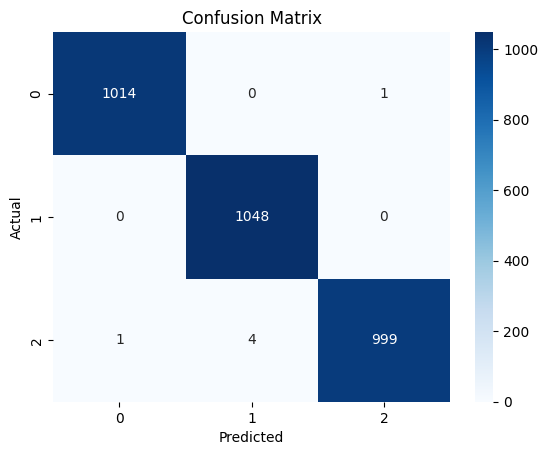

In [82]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Gaussian Naive Bayes Algorithm

In [83]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()   # assigning GaussianNB algorithm to variable
gnb.fit(X_train, y_train) #fitting

GaussianNB()

In [84]:
y_pred_nb= gnb.predict(X_test) #predicting

In [85]:
accuracy_nb= accuracy_score(y_test, y_pred_nb)
accuracy_nb #checking for accuracy

0.9980436909031627

In [86]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1015
           1       1.00      1.00      1.00      1048
           2       0.99      1.00      1.00      1004

    accuracy                           1.00      3067
   macro avg       1.00      1.00      1.00      3067
weighted avg       1.00      1.00      1.00      3067



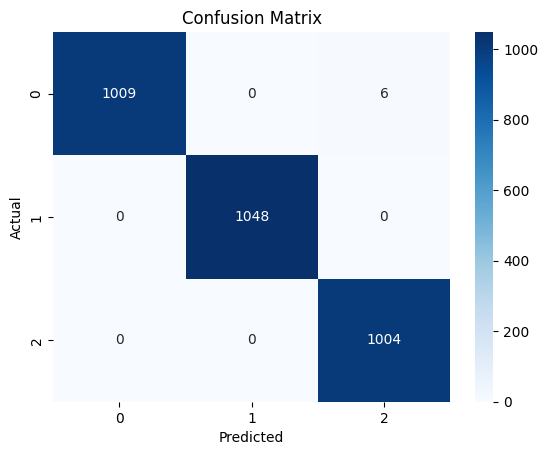

In [87]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## DecisionTreeClassifier

In [88]:
from sklearn.tree import DecisionTreeClassifier
de=DecisionTreeClassifier() # assigning DecisionTreeClassifier algorithm to variable
de.fit(X_train,y_train) #fitting

DecisionTreeClassifier()

In [89]:
y_pred_de=de.predict(X_test) #predicting

In [90]:
accuracy= accuracy_score(y_test, y_pred_de)
accuracy

1.0

In [91]:
print("\n Classification Report: \n " , classification_report(y_test, y_pred_de))


 Classification Report: 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1015
           1       1.00      1.00      1.00      1048
           2       1.00      1.00      1.00      1004

    accuracy                           1.00      3067
   macro avg       1.00      1.00      1.00      3067
weighted avg       1.00      1.00      1.00      3067



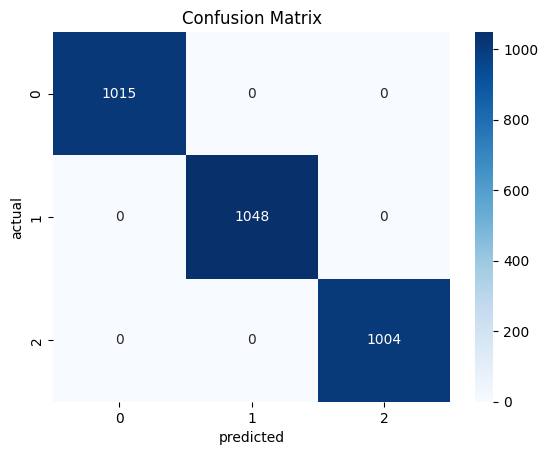

In [92]:
#confusion matrix
conf_matrix= confusion_matrix(y_test, y_pred_de)
#plotting using heatmap
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title("Confusion Matrix")
plt.show()

## Support Vector Classifier

In [93]:
from sklearn.svm import SVC

In [94]:
svc= SVC()    #assigning SVC algorithm to variable

In [95]:
svc.fit(X_train, y_train)  #fitting the model

SVC()

In [96]:
y_pred_svc= svc.predict(X_test)  #predicting the model

In [97]:
accuracy= accuracy_score(y_test, y_pred_svc)
accuracy

0.9921747636126508

In [98]:
print('\n Classification Report: \n', classification_report(y_test, y_pred_svc))


 Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1015
           1       1.00      1.00      1.00      1048
           2       0.98      0.99      0.99      1004

    accuracy                           0.99      3067
   macro avg       0.99      0.99      0.99      3067
weighted avg       0.99      0.99      0.99      3067



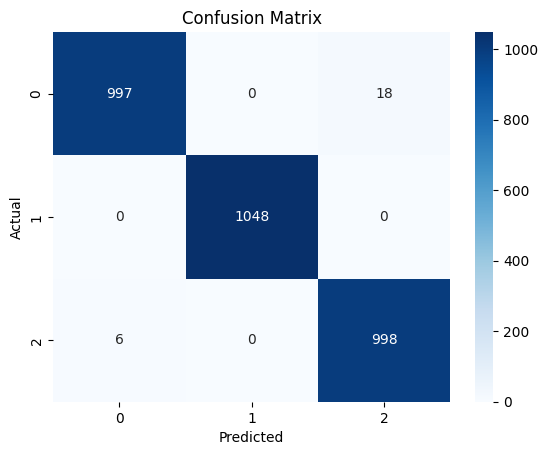

In [99]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()